### 11-16 Tax Policies
In this problem we explore a dynamic model of an economy, including the effects of
government taxes and spending, which we assume (for simplicity) takes place at the beginning of each
year. Let x(t) ∈ R n represent the pre-tax economic activity at the beginning of year t, across n sectors,
with x(t) i being the pre-tax activity level in sector i. We let x̃(t) ∈ R n denote the post-tax economic
activity, across n sectors, at the beginning of year t. We will assume that all entries of x(0) are positive,
which will imply that all entries of x(t) and x̃(t) are positive, for all t ≥ 0.

The pre- and post-tax activity levels are related as follows. The government taxes the sector activities
at rates given by r ∈ R n , with r i the tax rate for sector i. These rates all satisfy 0 ≤ r i < 1.
The total government revenue is then R(t) = r T x(t). This total revenue is then spent in the sectors
proportionally, with P s ∈ R n giving the spending proportions in the sectors. These spending proportions
n
satisfy s i ≥ 0 and i=1 s i = 1; the spending in sector i is s i R(t). The post-tax economic activity in
sector i, which accounts for the government taxes and spending, is then given by
<br\>
x̃(t) i = x(t) i − r i x(t) i + s i R(t),
i = 1, . . . , n,
t = 0, 1, . . . .
<br\>

Economic activity propagates from year to year as x(t + 1) = E x̃(t), where E ∈ R n×n is the input-
output matrix of the economy. You can assume that all entries of E are positive.
P n
We let S(t) = i=1 x(t) i denote the total economic activity in year t, and we let
G = lim
t→∞
S(t + 1)
S(t)
denote the (asymptotic) growth rate (assuming it exceeds one) of the economy.<br\>

(a) Explain why the growth rate does not depend on x(0) (unless it exactly satisfies a single linear
equation, which we rule out as essentially impossible). Express the growth rate G in terms of the
problem data r, s, and E, using ideas from the course. You may assume that a matrix that arises
in your analysis is diagonalizable and has a single dominant eigenvalue, i.e., an eigenvalue λ 1 that
satisfies |λ 1 | > |λ i | for i = 2, . . . , n. (These assumptions aren’t actually needed—they’re just to
simplify the problem for you.) <br\>

(b) Consider the problem instance with data






0.3 0.4 0.1 0.6
0.45
0.15
 0.2 0.3 0.7 0.2 
 0.25 
 0.3 





E = 
 0.1 0.2 0.2 0.1  , r =  0.1  , s =  0.4  .
0.4 0.2 0.3 0.2
0.1
0.15
Find the growth rate. Now find the growth rate with the tax rate set to zero, i.e., r = 0 (in which
case s doesn’t matter). You are welcome (even, encouraged) to simulate the economic activity to
double-check your answer, but we want the value using the expression found in part (a).

### (A)


since the problem is of the form x(t+1) = A x(t), we have to find just A which is = 

$$ A = E(I - diag(r) + sr^T) $$

this equation for dominant eigen value corresponding to left eigenvector x(t) = $\lambda ^t x(0)$ 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [62]:
E = np.asarray([[0.3,0.4,0.1,0.6],[0.2,0.3,0.7,0.2],
                [0.1,0.2,0.2,0.1],[0.4,0.2,0.3,0.2]])

r = np.asarray([0.45,0.25,0.1,0.1])
#r = np.zeros_like(r)

s = np.asarray([0.15,0.3,0.4,0.15])
A = E.dot(np.eye(4) - np.diag(r) + s[:,np.newaxis].dot(r[:,np.newaxis].T))

print(np.linalg.eigvals(A))

[ 1.12368108  0.19661384 -0.1958123  -0.09023262]


### Simulation

1.1236810829309065


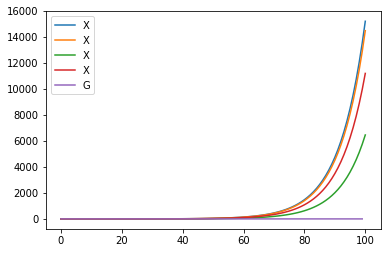

In [63]:

x = []
G = []
x.append([0.1,0.1,0.1,0.1])

r = np.asarray([0.45,0.25,0.1,0.1])
#r = np.zeros_like(r)
A = E.dot(np.eye(4) - np.diag(r) + s[:,np.newaxis].dot(r[:,np.newaxis].T))

for t in range(100):
    #print(r.T.dot(x[t]))
    x_bar = x[t] - r*x[t] + (r.T.dot(x[t]))*s
    next_x = E.dot(x_bar)
    #next_x = A.dot(x[t])
    x.append(next_x)
    G.append(np.sum(next_x) / (np.sum(x[t])+1e-9)  )

print(G[-1])
plt.plot(x, label='X')
plt.plot(G, label='G')
plt.legend()

plt.show()

1.0908459403530555


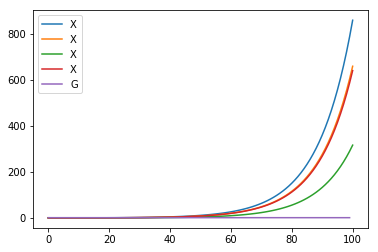

In [65]:
x = []
G = []
x.append([0.1,0.1,0.1,0.1])

#r = np.asarray([0.45,0.25,0.1,0.1])
r = np.zeros_like(r)
A = E.dot(np.eye(4) - np.diag(r) + s[:,np.newaxis].dot(r[:,np.newaxis].T))

for t in range(100):
    #print(r.T.dot(x[t]))
    x_bar = x[t] - r*x[t] + (r.T.dot(x[t]))*s
    next_x = E.dot(x_bar)
    #next_x = A.dot(x[t])
    x.append(next_x)
    G.append(np.sum(next_x) / (np.sum(x[t])+1e-9)  )

print(G[-1])
plt.plot(x, label='X')
plt.plot(G, label='G')
plt.legend()

plt.show()

### W/o Simulation

1.1236810829309065


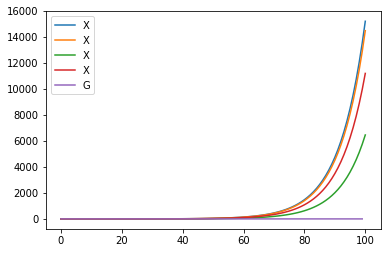

In [66]:
x = []
G = []
x.append([0.1,0.1,0.1,0.1])

r = np.asarray([0.45,0.25,0.1,0.1])
#r = np.zeros_like(r)
A = E.dot(np.eye(4) - np.diag(r) + s[:,np.newaxis].dot(r[:,np.newaxis].T))

for t in range(100):
    next_x = A.dot(x[t])
    x.append(next_x)
    G.append(np.sum(next_x) / (np.sum(x[t])+1e-9)  )

print(G[-1])
plt.plot(x, label='X')
plt.plot(G, label='G')
plt.legend()

plt.show()

1.0908459403530555


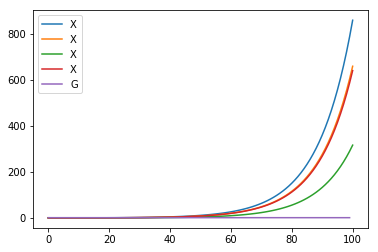

In [67]:
x = []
G = []
x.append([0.1,0.1,0.1,0.1])

r = np.zeros_like(r)
A = E.dot(np.eye(4) - np.diag(r) + s[:,np.newaxis].dot(r[:,np.newaxis].T))

for t in range(100):

    next_x = A.dot(x[t])
    x.append(next_x)
    G.append(np.sum(next_x) / (np.sum(x[t])+1e-9)  )

print(G[-1])
plt.plot(x, label='X')
plt.plot(G, label='G')
plt.legend()

plt.show()